## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [4]:
for i in range (100):
    temp_data = pd.read_csv('./test3/dp%d-blow-thick.csv'%(i+1),skiprows = 4, sep=',')
    s = "thick_dp%d = temp_data"%(i+1)
    exec(s)

In [5]:
for i in range (100):
    temp_data = pd.read_csv('./test3/dp%d-preform-temp.csv'%(i+1),skiprows = 4, sep=',')
    s = "temp_dp%d = temp_data"%(i+1)
    exec(s)

# training, label 분리

In [6]:
temp_dp100

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ C ]
0,0.000000,79.999992
1,0.001436,81.736534
2,0.002594,86.342461
3,0.003399,89.519218
4,0.004329,93.085533
...,...,...
59,0.100597,83.399986
60,0.101620,83.399986
61,0.102638,83.399986
62,0.103659,83.399986


In [7]:
TrainData_ = np.zeros((100,temp_dp1.shape[0]))
for i in range (100):
    exec("TrainData_[i,:] = temp_dp%d.iloc[:,1]"%(i+1))

In [8]:
TrainData = pd.DataFrame(TrainData_)
TrainData

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,79.999992,80.008720,80.031853,80.047844,80.065758,80.085930,80.109764,80.139031,80.174828,82.525566,...,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005
1,79.999992,80.026177,80.095604,80.143517,80.197258,80.257835,80.329338,80.417107,80.524498,80.895317,...,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986
2,79.999992,80.043633,80.159355,80.239159,80.328789,80.429741,80.548912,80.695183,80.874168,82.181236,...,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011
3,79.999992,80.061089,80.223106,80.334831,80.460289,80.601616,80.768456,80.973259,81.223839,83.836296,...,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998
4,79.999992,80.078545,80.286827,80.430504,80.591820,80.773521,80.988029,81.251335,81.573509,82.132225,...,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,79.999992,81.666740,86.087486,89.136559,92.559502,96.416008,100.968040,106.556053,113.393578,117.277153,...,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986
96,79.999992,81.684166,86.151237,89.232231,92.691002,96.587883,101.187584,106.834129,113.743248,117.787895,...,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998
97,79.999992,81.701622,86.214958,89.327873,92.822533,96.759788,101.407158,107.112206,114.092918,117.671074,...,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998
98,79.999992,81.719078,86.278709,89.423546,92.954033,96.931694,101.626701,107.390282,114.442589,115.819359,...,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992


In [9]:
thick_dp1

,Curve Length on Polyline 1 [ m ],THICKNESS [ mm ]
0,0.000000,2.144753
1,0.001955,2.135384
2,0.003509,2.121628
3,0.004578,2.109784
4,0.005797,2.091949
...,...,...
59,0.207333,2.732480
60,0.208397,2.824161
61,0.209443,2.871130
62,0.210484,2.892943


In [10]:
TrainLabel_ = []
for i in range(100):
    exec("thick_diff = np.max(thick_dp%d.iloc[:,1])-np.min(thick_dp%d.iloc[:,1])"%(i+1,i+1))
    TrainLabel_=np.append(TrainLabel_,thick_diff)

In [11]:
pd.DataFrame(TrainLabel_)

,0
0,2.518961
1,2.703356
2,2.522025
3,2.666949
4,2.681483
...,...
95,2.740651
96,2.790228
97,2.436277
98,2.510869


In [12]:
pd.DataFrame(TrainLabel_).describe()

,0
count,100.000000
mean,2.628319
std,0.097911
min,2.393767
25%,2.549101
50%,2.623595
75%,2.704178
max,2.801662


In [13]:
max_value = np.max(TrainLabel_)
min_value = np.min(TrainLabel_)

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [14]:
pd.set_option("Display.max_rows",10)
pd.DataFrame(TrainLabel)

,0
0,0.806926
1,1.258991
2,0.814437
3,1.169737
4,1.205368
...,...
95,1.350425
96,1.471969
97,0.604217
98,0.787088


## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [15]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [16]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [30, 40, 50, 60, 70]   # Number of Neurons on Hidden Layer 1
N2 = [10, 20, 30]           # Number of Neurons on Hidden Layer 2

Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1
Epoch          = 5000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 45


### 모델 학습 1 - FFT 특징 기반 Wn1, Wn2, R1, R2 예측

In [17]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('D:/testoneblow/test3/MLmodels/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('D:/testoneblow/test3/ANN_prediction5.0/Tr_result_epoch%d.csv'%(Epoch), index=None)





################## Model 1 (Predict :thickness) ##################


Trial No.1
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 30
Hidden 2 neuron : 10
[0 Epochs]    RMSE:24.19757,   MAE: 23.00582,  MAPE: 2171.74%
[100 Epochs]    RMSE:1.11397,   MAE: 0.99252,  MAPE: 96.90%
[200 Epochs]    RMSE:0.58442,   MAE: 0.50502,  MAPE: 47.59%
[300 Epochs]    RMSE:0.29044,   MAE: 0.21330,  MAPE: 20.85%
[400 Epochs]    RMSE:0.40610,   MAE: 0.33690,  MAPE: 35.55%
[500 Epochs]    RMSE:0.57142,   MAE: 0.50942,  MAPE: 53.17%
[600 Epochs]    RMSE:0.56944,   MAE: 0.51302,  MAPE: 53.38%
[700 Epochs]    RMSE:0.43682,   MAE: 0.36878,  MAPE: 39.02%
[800 Epochs]    RMSE:0.21575,   MAE: 0.17560,  MAPE: 18.55%
[900 Epochs]    RMSE:0.90318,   MAE: 0.87223,  MAPE: 88.07%
[1000 Epochs]    RMSE:1.13092,   MAE: 1.10398,  MAPE: 111.04%
[1100 Epochs]    RMSE:0.51050,   MAE: 0.45229,  MAPE: 41.32%
[1200 Epochs]    RMSE:0.40521,   MAE: 0.35571,  MAPE: 32.22%
[1300 Epochs]    RMSE:0.39606,   MAE: 0.3501

[2800 Epochs]    RMSE:0.10343,   MAE: 0.08311,  MAPE: 8.72%
[2900 Epochs]    RMSE:0.18342,   MAE: 0.15470,  MAPE: 13.86%
[3000 Epochs]    RMSE:0.18586,   MAE: 0.16323,  MAPE: 14.94%
[3100 Epochs]    RMSE:0.08123,   MAE: 0.06159,  MAPE: 6.23%
[3200 Epochs]    RMSE:0.17852,   MAE: 0.16128,  MAPE: 14.93%
[3300 Epochs]    RMSE:0.07863,   MAE: 0.05822,  MAPE: 6.07%
[3400 Epochs]    RMSE:0.11077,   MAE: 0.09116,  MAPE: 9.56%
[3500 Epochs]    RMSE:0.07724,   MAE: 0.05911,  MAPE: 6.04%
[3600 Epochs]    RMSE:0.08460,   MAE: 0.06872,  MAPE: 7.04%
[3700 Epochs]    RMSE:0.15698,   MAE: 0.14137,  MAPE: 13.21%
[3800 Epochs]    RMSE:0.06781,   MAE: 0.05042,  MAPE: 5.20%
[3900 Epochs]    RMSE:0.10455,   MAE: 0.09169,  MAPE: 9.23%
[4000 Epochs]    RMSE:0.08354,   MAE: 0.06680,  MAPE: 7.02%
[4100 Epochs]    RMSE:0.10931,   MAE: 0.09501,  MAPE: 9.98%
[4200 Epochs]    RMSE:0.06974,   MAE: 0.05367,  MAPE: 5.52%
[4300 Epochs]    RMSE:0.11235,   MAE: 0.10026,  MAPE: 10.32%
[4400 Epochs]    RMSE:0.08712,   MA

[600 Epochs]    RMSE:1.28554,   MAE: 1.15635,  MAPE: 116.53%
[700 Epochs]    RMSE:0.85633,   MAE: 0.69919,  MAPE: 71.38%
[800 Epochs]    RMSE:1.22451,   MAE: 1.11634,  MAPE: 112.15%
[900 Epochs]    RMSE:1.05620,   MAE: 0.93831,  MAPE: 94.59%
[1000 Epochs]    RMSE:0.78178,   MAE: 0.65869,  MAPE: 67.28%
[1100 Epochs]    RMSE:0.93261,   MAE: 0.82913,  MAPE: 83.79%
[1200 Epochs]    RMSE:0.89305,   MAE: 0.79356,  MAPE: 80.44%
[1300 Epochs]    RMSE:0.92911,   MAE: 0.84017,  MAPE: 84.82%
[1400 Epochs]    RMSE:0.86574,   MAE: 0.77682,  MAPE: 78.60%
[1500 Epochs]    RMSE:0.78796,   MAE: 0.69693,  MAPE: 70.88%
[1600 Epochs]    RMSE:0.70219,   MAE: 0.60988,  MAPE: 62.42%
[1700 Epochs]    RMSE:0.29072,   MAE: 0.22693,  MAPE: 23.43%
[1800 Epochs]    RMSE:0.37573,   MAE: 0.31874,  MAPE: 32.92%
[1900 Epochs]    RMSE:0.47443,   MAE: 0.42700,  MAPE: 39.25%
[2000 Epochs]    RMSE:0.20365,   MAE: 0.16134,  MAPE: 16.19%
[2100 Epochs]    RMSE:0.73739,   MAE: 0.68712,  MAPE: 70.90%
[2200 Epochs]    RMSE:0.27

[3600 Epochs]    RMSE:0.07500,   MAE: 0.05588,  MAPE: 5.55%
[3700 Epochs]    RMSE:0.10522,   MAE: 0.09096,  MAPE: 8.69%
[3800 Epochs]    RMSE:0.20092,   MAE: 0.18719,  MAPE: 17.52%
[3900 Epochs]    RMSE:0.10563,   MAE: 0.08589,  MAPE: 8.32%
[4000 Epochs]    RMSE:0.13562,   MAE: 0.11669,  MAPE: 11.17%
[4100 Epochs]    RMSE:0.14298,   MAE: 0.13097,  MAPE: 13.37%
[4200 Epochs]    RMSE:0.07665,   MAE: 0.06072,  MAPE: 6.14%
[4300 Epochs]    RMSE:0.07695,   MAE: 0.06241,  MAPE: 6.12%
[4400 Epochs]    RMSE:0.07364,   MAE: 0.05535,  MAPE: 5.75%
[4500 Epochs]    RMSE:0.06689,   MAE: 0.04921,  MAPE: 5.32%
[4600 Epochs]    RMSE:0.14904,   MAE: 0.13312,  MAPE: 12.51%
[4700 Epochs]    RMSE:0.09472,   MAE: 0.07977,  MAPE: 7.91%
[4800 Epochs]    RMSE:0.07273,   MAE: 0.05613,  MAPE: 5.78%
[4900 Epochs]    RMSE:0.13107,   MAE: 0.11554,  MAPE: 11.17%

[Final Epochs]    RMSE:0.07882,   MAE: 0.06432,  MAPE: 6.78%


Trial No.9
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron

[1400 Epochs]    RMSE:0.15599,   MAE: 0.12639,  MAPE: 12.04%
[1500 Epochs]    RMSE:0.18153,   MAE: 0.15150,  MAPE: 13.92%
[1600 Epochs]    RMSE:0.13810,   MAE: 0.10982,  MAPE: 10.70%
[1700 Epochs]    RMSE:0.15521,   MAE: 0.12867,  MAPE: 12.11%
[1800 Epochs]    RMSE:0.16046,   MAE: 0.13179,  MAPE: 14.50%
[1900 Epochs]    RMSE:0.11514,   MAE: 0.08262,  MAPE: 8.93%
[2000 Epochs]    RMSE:0.11808,   MAE: 0.08713,  MAPE: 8.82%
[2100 Epochs]    RMSE:0.13292,   MAE: 0.10574,  MAPE: 10.17%
[2200 Epochs]    RMSE:0.12550,   MAE: 0.09799,  MAPE: 9.49%
[2300 Epochs]    RMSE:0.11480,   MAE: 0.08697,  MAPE: 8.58%
[2400 Epochs]    RMSE:0.12767,   MAE: 0.10237,  MAPE: 9.81%
[2500 Epochs]    RMSE:0.14423,   MAE: 0.12186,  MAPE: 13.03%
[2600 Epochs]    RMSE:0.13054,   MAE: 0.10885,  MAPE: 11.63%
[2700 Epochs]    RMSE:0.11360,   MAE: 0.08775,  MAPE: 8.47%
[2800 Epochs]    RMSE:0.13370,   MAE: 0.11238,  MAPE: 12.01%
[2900 Epochs]    RMSE:0.09541,   MAE: 0.06595,  MAPE: 6.81%
[3000 Epochs]    RMSE:0.09371, 

[4600 Epochs]    RMSE:0.08188,   MAE: 0.06084,  MAPE: 6.30%
[4700 Epochs]    RMSE:0.11439,   MAE: 0.09597,  MAPE: 9.01%
[4800 Epochs]    RMSE:0.18047,   MAE: 0.15816,  MAPE: 14.77%
[4900 Epochs]    RMSE:0.12989,   MAE: 0.11240,  MAPE: 10.66%

[Final Epochs]    RMSE:0.11990,   MAE: 0.09860,  MAPE: 10.31%


Trial No.14
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 20
[0 Epochs]    RMSE:103.01693,   MAE: 102.36785,  MAPE: 9908.13%
[100 Epochs]    RMSE:0.49643,   MAE: 0.39874,  MAPE: 40.15%
[200 Epochs]    RMSE:0.37665,   MAE: 0.31290,  MAPE: 28.79%
[300 Epochs]    RMSE:0.25438,   MAE: 0.20489,  MAPE: 19.25%
[400 Epochs]    RMSE:0.25326,   MAE: 0.20774,  MAPE: 19.11%
[500 Epochs]    RMSE:0.36703,   MAE: 0.32530,  MAPE: 29.53%
[600 Epochs]    RMSE:0.37230,   MAE: 0.33564,  MAPE: 30.84%
[700 Epochs]    RMSE:0.38616,   MAE: 0.32309,  MAPE: 29.57%
[800 Epochs]    RMSE:0.38732,   MAE: 0.32946,  MAPE: 29.53%
[900 Epochs]    RMSE:0.36435,   MAE: 0.32085,  MAPE

[2400 Epochs]    RMSE:0.11187,   MAE: 0.07432,  MAPE: 7.47%
[2500 Epochs]    RMSE:0.10373,   MAE: 0.06780,  MAPE: 7.22%
[2600 Epochs]    RMSE:0.10692,   MAE: 0.07393,  MAPE: 7.65%
[2700 Epochs]    RMSE:0.11668,   MAE: 0.08026,  MAPE: 8.26%
[2800 Epochs]    RMSE:0.10599,   MAE: 0.06944,  MAPE: 7.00%
[2900 Epochs]    RMSE:0.10777,   MAE: 0.07779,  MAPE: 7.66%
[3000 Epochs]    RMSE:0.10485,   MAE: 0.06845,  MAPE: 6.75%
[3100 Epochs]    RMSE:0.15882,   MAE: 0.12671,  MAPE: 13.47%
[3200 Epochs]    RMSE:0.10369,   MAE: 0.07535,  MAPE: 8.10%
[3300 Epochs]    RMSE:0.13199,   MAE: 0.10011,  MAPE: 9.47%
[3400 Epochs]    RMSE:0.12516,   MAE: 0.09064,  MAPE: 8.91%
[3500 Epochs]    RMSE:0.11626,   MAE: 0.09444,  MAPE: 10.02%
[3600 Epochs]    RMSE:0.10126,   MAE: 0.07264,  MAPE: 6.82%
[3700 Epochs]    RMSE:0.14245,   MAE: 0.10846,  MAPE: 10.24%
[3800 Epochs]    RMSE:0.08442,   MAE: 0.05597,  MAPE: 5.49%
[3900 Epochs]    RMSE:0.09388,   MAE: 0.06106,  MAPE: 5.85%
[4000 Epochs]    RMSE:0.07939,   MAE:

[200 Epochs]    RMSE:0.28399,   MAE: 0.23340,  MAPE: 20.77%
[300 Epochs]    RMSE:0.24150,   MAE: 0.20685,  MAPE: 20.44%
[400 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[500 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[600 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[700 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[800 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[900 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1000 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1100 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1200 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1300 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1400 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1500 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1600 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1700 Epochs]    RMSE:0.23970,   MAE: 0.20619,  MAPE: 20.68%
[1800 Epochs]    RMSE:0.23970,  

[3400 Epochs]    RMSE:0.10715,   MAE: 0.09073,  MAPE: 9.04%
[3500 Epochs]    RMSE:0.07465,   MAE: 0.06002,  MAPE: 6.01%
[3600 Epochs]    RMSE:0.06604,   MAE: 0.04644,  MAPE: 4.74%
[3700 Epochs]    RMSE:0.06276,   MAE: 0.04795,  MAPE: 5.01%
[3800 Epochs]    RMSE:0.07713,   MAE: 0.06657,  MAPE: 6.56%
[3900 Epochs]    RMSE:0.12412,   MAE: 0.10533,  MAPE: 9.62%
[4000 Epochs]    RMSE:0.11155,   MAE: 0.08466,  MAPE: 9.12%
[4100 Epochs]    RMSE:0.09720,   MAE: 0.08077,  MAPE: 7.89%
[4200 Epochs]    RMSE:0.09960,   MAE: 0.08369,  MAPE: 7.90%
[4300 Epochs]    RMSE:0.07628,   MAE: 0.06136,  MAPE: 6.14%
[4400 Epochs]    RMSE:0.09734,   MAE: 0.07622,  MAPE: 7.79%
[4500 Epochs]    RMSE:0.09606,   MAE: 0.07567,  MAPE: 7.57%
[4600 Epochs]    RMSE:0.10224,   MAE: 0.08447,  MAPE: 8.33%
[4700 Epochs]    RMSE:0.06091,   MAE: 0.05228,  MAPE: 5.21%
[4800 Epochs]    RMSE:0.05516,   MAE: 0.04508,  MAPE: 4.55%
[4900 Epochs]    RMSE:0.11155,   MAE: 0.08663,  MAPE: 8.93%

[Final Epochs]    RMSE:0.09555,   MAE: 

[1400 Epochs]    RMSE:0.12010,   MAE: 0.08310,  MAPE: 8.29%
[1500 Epochs]    RMSE:0.11146,   MAE: 0.07334,  MAPE: 7.70%
[1600 Epochs]    RMSE:0.10508,   MAE: 0.06557,  MAPE: 6.92%
[1700 Epochs]    RMSE:0.12560,   MAE: 0.09205,  MAPE: 8.70%
[1800 Epochs]    RMSE:0.09865,   MAE: 0.06292,  MAPE: 6.36%
[1900 Epochs]    RMSE:0.10181,   MAE: 0.06632,  MAPE: 6.65%
[2000 Epochs]    RMSE:0.09278,   MAE: 0.06138,  MAPE: 6.17%
[2100 Epochs]    RMSE:0.09590,   MAE: 0.06696,  MAPE: 6.59%
[2200 Epochs]    RMSE:0.08747,   MAE: 0.06052,  MAPE: 5.84%
[2300 Epochs]    RMSE:0.07911,   MAE: 0.05851,  MAPE: 5.66%
[2400 Epochs]    RMSE:0.08678,   MAE: 0.06140,  MAPE: 6.06%
[2500 Epochs]    RMSE:0.10719,   MAE: 0.08488,  MAPE: 8.68%
[2600 Epochs]    RMSE:0.07654,   MAE: 0.05884,  MAPE: 6.11%
[2700 Epochs]    RMSE:0.07336,   MAE: 0.05593,  MAPE: 5.99%
[2800 Epochs]    RMSE:0.06841,   MAE: 0.04531,  MAPE: 4.84%
[2900 Epochs]    RMSE:0.06681,   MAE: 0.04728,  MAPE: 4.99%
[3000 Epochs]    RMSE:0.07987,   MAE: 0.

[4600 Epochs]    RMSE:0.05754,   MAE: 0.04304,  MAPE: 4.57%
[4700 Epochs]    RMSE:0.05355,   MAE: 0.04465,  MAPE: 4.28%
[4800 Epochs]    RMSE:0.07741,   MAE: 0.06650,  MAPE: 6.31%
[4900 Epochs]    RMSE:0.04528,   MAE: 0.03375,  MAPE: 3.44%

[Final Epochs]    RMSE:0.06142,   MAE: 0.04972,  MAPE: 5.21%


Trial No.27
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:60.61309,   MAE: 60.41980,  MAPE: 5901.21%
[100 Epochs]    RMSE:0.55377,   MAE: 0.48224,  MAPE: 49.61%
[200 Epochs]    RMSE:0.24850,   MAE: 0.20465,  MAPE: 18.56%
[300 Epochs]    RMSE:0.19820,   MAE: 0.15952,  MAPE: 15.38%
[400 Epochs]    RMSE:0.18941,   MAE: 0.13964,  MAPE: 14.84%
[500 Epochs]    RMSE:0.20393,   MAE: 0.16616,  MAPE: 15.84%
[600 Epochs]    RMSE:0.17063,   MAE: 0.12817,  MAPE: 13.19%
[700 Epochs]    RMSE:0.16066,   MAE: 0.12512,  MAPE: 12.59%
[800 Epochs]    RMSE:0.13259,   MAE: 0.10089,  MAPE: 10.48%
[900 Epochs]    RMSE:0.14945,   MAE: 0.12371,  MAPE: 12.

[2400 Epochs]    RMSE:0.09005,   MAE: 0.06144,  MAPE: 6.45%
[2500 Epochs]    RMSE:0.08350,   MAE: 0.05448,  MAPE: 5.79%
[2600 Epochs]    RMSE:0.08826,   MAE: 0.06232,  MAPE: 6.68%
[2700 Epochs]    RMSE:0.09121,   MAE: 0.06564,  MAPE: 6.98%
[2800 Epochs]    RMSE:0.08091,   MAE: 0.05300,  MAPE: 5.64%
[2900 Epochs]    RMSE:0.08483,   MAE: 0.06011,  MAPE: 6.20%
[3000 Epochs]    RMSE:0.07748,   MAE: 0.04887,  MAPE: 5.13%
[3100 Epochs]    RMSE:0.08098,   MAE: 0.05528,  MAPE: 5.68%
[3200 Epochs]    RMSE:0.07822,   MAE: 0.05159,  MAPE: 5.44%
[3300 Epochs]    RMSE:0.07990,   MAE: 0.05360,  MAPE: 5.48%
[3400 Epochs]    RMSE:0.10461,   MAE: 0.08305,  MAPE: 8.49%
[3500 Epochs]    RMSE:0.09582,   MAE: 0.07472,  MAPE: 7.80%
[3600 Epochs]    RMSE:0.07431,   MAE: 0.04969,  MAPE: 5.26%
[3700 Epochs]    RMSE:0.06473,   MAE: 0.04050,  MAPE: 4.18%
[3800 Epochs]    RMSE:0.07289,   MAE: 0.04922,  MAPE: 4.89%
[3900 Epochs]    RMSE:0.07099,   MAE: 0.04902,  MAPE: 5.02%
[4000 Epochs]    RMSE:0.06432,   MAE: 0.

[200 Epochs]    RMSE:0.43504,   MAE: 0.36336,  MAPE: 39.00%
[300 Epochs]    RMSE:0.35644,   MAE: 0.30520,  MAPE: 26.48%
[400 Epochs]    RMSE:0.20432,   MAE: 0.16377,  MAPE: 17.90%
[500 Epochs]    RMSE:0.21593,   MAE: 0.17213,  MAPE: 19.13%
[600 Epochs]    RMSE:0.19073,   MAE: 0.15200,  MAPE: 16.11%
[700 Epochs]    RMSE:0.21995,   MAE: 0.19013,  MAPE: 20.28%
[800 Epochs]    RMSE:0.17812,   MAE: 0.14758,  MAPE: 13.70%
[900 Epochs]    RMSE:0.13881,   MAE: 0.10241,  MAPE: 10.14%
[1000 Epochs]    RMSE:0.15047,   MAE: 0.12527,  MAPE: 12.55%
[1100 Epochs]    RMSE:0.13069,   MAE: 0.09321,  MAPE: 8.95%
[1200 Epochs]    RMSE:0.15489,   MAE: 0.12728,  MAPE: 12.41%
[1300 Epochs]    RMSE:0.13563,   MAE: 0.10911,  MAPE: 11.16%
[1400 Epochs]    RMSE:0.12843,   MAE: 0.09591,  MAPE: 10.17%
[1500 Epochs]    RMSE:0.13203,   MAE: 0.09980,  MAPE: 9.41%
[1600 Epochs]    RMSE:0.14863,   MAE: 0.11971,  MAPE: 11.16%
[1700 Epochs]    RMSE:0.12901,   MAE: 0.09680,  MAPE: 9.05%
[1800 Epochs]    RMSE:0.11945,   MA

[3300 Epochs]    RMSE:0.09055,   MAE: 0.06220,  MAPE: 6.21%
[3400 Epochs]    RMSE:0.09240,   MAE: 0.06190,  MAPE: 6.35%
[3500 Epochs]    RMSE:0.07897,   MAE: 0.05155,  MAPE: 5.50%
[3600 Epochs]    RMSE:0.09670,   MAE: 0.07631,  MAPE: 8.11%
[3700 Epochs]    RMSE:0.07712,   MAE: 0.04735,  MAPE: 4.93%
[3800 Epochs]    RMSE:0.08301,   MAE: 0.05814,  MAPE: 5.71%
[3900 Epochs]    RMSE:0.07447,   MAE: 0.04532,  MAPE: 4.70%
[4000 Epochs]    RMSE:0.08950,   MAE: 0.06429,  MAPE: 6.67%
[4100 Epochs]    RMSE:0.08737,   MAE: 0.06274,  MAPE: 5.94%
[4200 Epochs]    RMSE:0.08731,   MAE: 0.05908,  MAPE: 5.63%
[4300 Epochs]    RMSE:0.07952,   MAE: 0.05490,  MAPE: 5.64%
[4400 Epochs]    RMSE:0.07004,   MAE: 0.04058,  MAPE: 4.21%
[4500 Epochs]    RMSE:0.07261,   MAE: 0.04637,  MAPE: 4.76%
[4600 Epochs]    RMSE:0.08590,   MAE: 0.06673,  MAPE: 6.65%
[4700 Epochs]    RMSE:0.07437,   MAE: 0.05218,  MAPE: 5.21%
[4800 Epochs]    RMSE:0.07347,   MAE: 0.05440,  MAPE: 5.55%
[4900 Epochs]    RMSE:0.06810,   MAE: 0.

[1200 Epochs]    RMSE:0.18503,   MAE: 0.14680,  MAPE: 15.93%
[1300 Epochs]    RMSE:0.15827,   MAE: 0.12290,  MAPE: 12.88%
[1400 Epochs]    RMSE:0.14015,   MAE: 0.11229,  MAPE: 11.50%
[1500 Epochs]    RMSE:0.18598,   MAE: 0.15903,  MAPE: 17.02%
[1600 Epochs]    RMSE:0.12557,   MAE: 0.09184,  MAPE: 9.55%
[1700 Epochs]    RMSE:0.12451,   MAE: 0.08681,  MAPE: 9.12%
[1800 Epochs]    RMSE:0.12607,   MAE: 0.08899,  MAPE: 9.05%
[1900 Epochs]    RMSE:0.12595,   MAE: 0.09154,  MAPE: 9.71%
[2000 Epochs]    RMSE:0.17700,   MAE: 0.12674,  MAPE: 12.29%
[2100 Epochs]    RMSE:0.12371,   MAE: 0.09040,  MAPE: 9.01%
[2200 Epochs]    RMSE:0.11085,   MAE: 0.07151,  MAPE: 7.67%
[2300 Epochs]    RMSE:0.10915,   MAE: 0.06564,  MAPE: 6.90%
[2400 Epochs]    RMSE:0.11739,   MAE: 0.08070,  MAPE: 8.47%
[2500 Epochs]    RMSE:0.10383,   MAE: 0.06784,  MAPE: 7.11%
[2600 Epochs]    RMSE:0.09848,   MAE: 0.06133,  MAPE: 6.62%
[2700 Epochs]    RMSE:0.09296,   MAE: 0.05725,  MAPE: 6.13%
[2800 Epochs]    RMSE:0.09641,   MA

[4400 Epochs]    RMSE:0.07266,   MAE: 0.05072,  MAPE: 5.07%
[4500 Epochs]    RMSE:0.05322,   MAE: 0.03349,  MAPE: 3.29%
[4600 Epochs]    RMSE:0.10478,   MAE: 0.08264,  MAPE: 7.73%
[4700 Epochs]    RMSE:0.08384,   MAE: 0.05923,  MAPE: 5.78%
[4800 Epochs]    RMSE:0.10374,   MAE: 0.07982,  MAPE: 7.95%
[4900 Epochs]    RMSE:0.04988,   MAE: 0.03690,  MAPE: 3.62%

[Final Epochs]    RMSE:0.04114,   MAE: 0.02843,  MAPE: 2.92%


Trial No.40
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 60
Hidden 2 neuron : 10
[0 Epochs]    RMSE:26.67366,   MAE: 24.51799,  MAPE: 2311.38%
[100 Epochs]    RMSE:0.29541,   MAE: 0.24172,  MAPE: 21.22%
[200 Epochs]    RMSE:0.23929,   MAE: 0.20619,  MAPE: 20.79%
[300 Epochs]    RMSE:0.23929,   MAE: 0.20619,  MAPE: 20.79%
[400 Epochs]    RMSE:0.23929,   MAE: 0.20619,  MAPE: 20.79%
[500 Epochs]    RMSE:0.23929,   MAE: 0.20619,  MAPE: 20.79%
[600 Epochs]    RMSE:0.23929,   MAE: 0.20619,  MAPE: 20.79%
[700 Epochs]    RMSE:0.23929,   MAE: 0.20619,  MAPE: 20.7

[2200 Epochs]    RMSE:0.13270,   MAE: 0.10092,  MAPE: 10.25%
[2300 Epochs]    RMSE:0.10910,   MAE: 0.06697,  MAPE: 7.03%
[2400 Epochs]    RMSE:0.12336,   MAE: 0.09184,  MAPE: 8.99%
[2500 Epochs]    RMSE:0.13532,   MAE: 0.10745,  MAPE: 10.82%
[2600 Epochs]    RMSE:0.16879,   MAE: 0.13567,  MAPE: 12.39%
[2700 Epochs]    RMSE:0.14361,   MAE: 0.11019,  MAPE: 11.57%
[2800 Epochs]    RMSE:0.13718,   MAE: 0.10652,  MAPE: 11.11%
[2900 Epochs]    RMSE:0.11798,   MAE: 0.08174,  MAPE: 8.32%
[3000 Epochs]    RMSE:0.12081,   MAE: 0.08776,  MAPE: 8.97%
[3100 Epochs]    RMSE:0.11317,   MAE: 0.08297,  MAPE: 8.44%
[3200 Epochs]    RMSE:0.10434,   MAE: 0.06632,  MAPE: 6.99%
[3300 Epochs]    RMSE:0.12174,   MAE: 0.08480,  MAPE: 8.57%
[3400 Epochs]    RMSE:0.10751,   MAE: 0.07304,  MAPE: 7.60%
[3500 Epochs]    RMSE:0.12167,   MAE: 0.08901,  MAPE: 8.63%
[3600 Epochs]    RMSE:0.09891,   MAE: 0.06100,  MAPE: 6.30%
[3700 Epochs]    RMSE:0.12655,   MAE: 0.09358,  MAPE: 9.32%
[3800 Epochs]    RMSE:0.10260,   MA

[0 Epochs]    RMSE:20.93404,   MAE: 20.30263,  MAPE: 1927.39%
[100 Epochs]    RMSE:0.18791,   MAE: 0.14358,  MAPE: 13.64%
[200 Epochs]    RMSE:0.21240,   MAE: 0.17453,  MAPE: 15.56%
[300 Epochs]    RMSE:0.14280,   MAE: 0.10993,  MAPE: 11.62%
[400 Epochs]    RMSE:0.12814,   MAE: 0.09738,  MAPE: 9.80%
[500 Epochs]    RMSE:0.15459,   MAE: 0.11534,  MAPE: 11.51%
[600 Epochs]    RMSE:0.29832,   MAE: 0.24852,  MAPE: 25.51%
[700 Epochs]    RMSE:0.14987,   MAE: 0.11405,  MAPE: 11.44%
[800 Epochs]    RMSE:0.15002,   MAE: 0.11742,  MAPE: 11.03%
[900 Epochs]    RMSE:0.22447,   MAE: 0.19064,  MAPE: 19.04%
[1000 Epochs]    RMSE:0.12233,   MAE: 0.08616,  MAPE: 8.94%
[1100 Epochs]    RMSE:0.15233,   MAE: 0.12567,  MAPE: 12.93%
[1200 Epochs]    RMSE:0.10054,   MAE: 0.07421,  MAPE: 7.93%
[1300 Epochs]    RMSE:0.13893,   MAE: 0.10268,  MAPE: 10.36%
[1400 Epochs]    RMSE:0.10583,   MAE: 0.07806,  MAPE: 7.84%
[1500 Epochs]    RMSE:0.13011,   MAE: 0.09711,  MAPE: 10.45%
[1600 Epochs]    RMSE:0.10810,   MAE

### [Wn1, Wn2, R1, R2] 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [18]:
for M in range(1):

    Tr_result_temp = pd.read_csv('D:/testoneblow/test3/ANN_prediction5.0/Tr_result_epoch5000.csv')
    learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
    noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
    noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
    Epoch          = 20000
    
    print('\n\n\nPrediction :' + Model[M])
    print('Learning rate : {:.3}'.format(learningRate))
    print('Hidden 1 neuron : %d'%(noOfNeuron1))
    print('Hidden 2 neuron : %d'%(noOfNeuron2))
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    
    ################ 신경망 구조 재설계 ################

    tf.keras.backend.clear_session()
    def ANN_model(input_data):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units = noOfNeuron_in,
                                     input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
        model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
        model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
        model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                      loss=keras.losses.mean_absolute_error,
                      metrics=['mse','mae','mape'])
        return model
    model = ANN_model(TrainData)

    ################ 신경망 학습 ################

    BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
    print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
          .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))
    
    # 모델 저장
    model.save('D:/testoneblow/test3/MLmodels/BestModel_2DOF_0410_M%d.h5'%(M+1))
    
    # 히스토리 저장
    RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
    MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
    MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

    History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
    History_temp.to_csv("D:/testoneblow/test3/MLmodels/BestModel_2DOF_0410_M%d_history.csv"%(M+1), index=None)




Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 60
Hidden 2 neuron : 10
[0 Epochs]    RMSE:17.74649,   MAE: 17.58375,  MAPE: 1724.43%
[100 Epochs]    RMSE:0.68357,   MAE: 0.64048,  MAPE: 57.28%
[200 Epochs]    RMSE:0.30319,   MAE: 0.24747,  MAPE: 21.55%
[300 Epochs]    RMSE:0.24253,   MAE: 0.20726,  MAPE: 20.36%
[400 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[500 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[600 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[700 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[800 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[900 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[1000 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[1100 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[1200 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[1300 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[1400 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[150

[13300 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[13400 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[13500 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[13600 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[13700 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[13800 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[13900 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14000 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14100 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14200 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14300 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14400 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14500 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14600 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14700 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14800 Epochs]    RMSE:0.23971,   MAE: 0.20619,  MAPE: 20.68%
[14900 E

(0.0, 100.0)

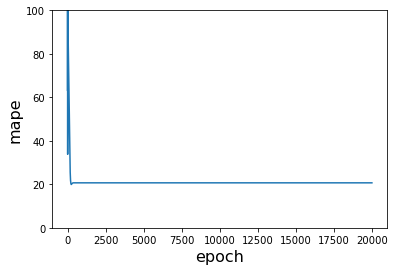

In [19]:
plt.plot(BestModel_temp.history['mape'])

plt.ylabel("mape", fontsize='16')
plt.xlabel("epoch", fontsize='16')
plt.ylim(0,100)

In [20]:
(model.predict(TrainData)-0.5)*dist_value+min_value

array([[2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],
       [2.6199696],


In [21]:
type(TrainLabel_)

numpy.ndarray

In [22]:
TrainLabel_

array([2.51896068, 2.70335576, 2.52202457, 2.66694934, 2.68148298,
       2.56417159, 2.64027971, 2.66874182, 2.59473473, 2.74888086,
       2.53527009, 2.49784204, 2.58969265, 2.68305594, 2.74221582,
       2.54374227, 2.50615877, 2.56171465, 2.69741779, 2.59782195,
       2.70664556, 2.53542474, 2.69680355, 2.54943454, 2.66934219,
       2.71118129, 2.64519534, 2.55346903, 2.66387352, 2.49785423,
       2.59022778, 2.55941489, 2.73402693, 2.59270895, 2.69532039,
       2.71816353, 2.55020309, 2.67016816, 2.74198201, 2.57695142,
       2.61779651, 2.70057685, 2.50013465, 2.77269458, 2.58684051,
       2.5758895 , 2.76234816, 2.44997927, 2.64292238, 2.47817377,
       2.5923759 , 2.73457674, 2.51551128, 2.79848203, 2.61179278,
       2.59582204, 2.79314134, 2.75142461, 2.77652874, 2.52196294,
       2.74476173, 2.72416079, 2.74513482, 2.67388439, 2.52527967,
       2.58783969, 2.57141221, 2.65479174, 2.46158081, 2.62852797,
       2.53020596, 2.66424564, 2.75384301, 2.80166199, 2.59378

In [23]:
TrainLabel_[99]

2.701245431

In [24]:
ErrorTable = np.zeros((TrainLabel.shape[0],4))
ErrorTable[:,0] = TrainLabel_
for i in range(TrainLabel.shape[0]):
    a = ((model.predict(TrainData)-0.5)*dist_value+min_value)[i]
    ErrorTable[i,1] = a
    ErrorTable[i,2] = ((TrainLabel_[i]-a)/TrainLabel_[i])*100
    ErrorTable[i,3] = np.abs(((TrainLabel_[i]-a)/TrainLabel_[i])*100)

In [25]:
ErrorTable = pd.DataFrame(ErrorTable)
ErrorTable

,0,1,2,3
0,2.518961,2.61997,-4.009943,4.009943
1,2.703356,2.61997,3.084543,3.084543
2,2.522025,2.61997,-3.883585,3.883585
3,2.666949,2.61997,1.761551,1.761551
4,2.681483,2.61997,2.294008,2.294008
...,...,...,...,...
95,2.740651,2.61997,4.403380,4.403380
96,2.790228,2.61997,6.101965,6.101965
97,2.436277,2.61997,-7.539894,7.539894
98,2.510869,2.61997,-4.345142,4.345142


In [26]:
np.mean(ErrorTable.iloc[:,3])

3.1991755063459277

In [27]:
ErrorTable.to_csv('D:/testoneblow/test3/ANN_prediction5.0/ErrorTable.csv')

## K fold

In [28]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)
FoldDataNo

20

In [29]:
TrainData.shape

(100, 64)

In [30]:
TrainLabel

,0
0,0.806926
1,1.258991
2,0.814437
3,1.169737
4,1.205368
...,...
95,1.350425
96,1.471969
97,0.604217
98,0.787088


In [31]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  = TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,79.999992,80.008720,80.031853,80.047844,80.065758,80.085930,80.109764,80.139031,80.174828,82.525566,...,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005
1,79.999992,80.026177,80.095604,80.143517,80.197258,80.257835,80.329338,80.417107,80.524498,80.895317,...,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986
2,79.999992,80.043633,80.159355,80.239159,80.328789,80.429741,80.548912,80.695183,80.874168,82.181236,...,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011
3,79.999992,80.061089,80.223106,80.334831,80.460289,80.601616,80.768456,80.973259,81.223839,83.836296,...,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998
4,79.999992,80.078545,80.286827,80.430504,80.591820,80.773521,80.988029,81.251335,81.573509,82.132225,...,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,79.999992,80.270500,80.988029,81.482902,82.038444,82.664360,83.403191,84.310142,85.419884,87.639641,...,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986
16,79.999992,80.287956,81.051750,81.578575,82.169975,82.836266,83.622734,84.588219,85.769585,89.368523,...,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986
17,79.999992,80.305412,81.115501,81.674248,82.301475,83.008171,83.842308,84.866295,86.119225,87.479881,...,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992
18,79.999992,80.322868,81.179253,81.769890,82.432976,83.180046,84.061882,85.144371,86.468925,90.390007,...,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986


In [32]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((80, 64), (80, 1))

In [33]:
Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1

In [34]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    
    for M in range(1):

        Tr_result_temp = pd.read_csv('D:/testoneblow/test3/ANN_prediction5.0/Tr_result_epoch5000.csv')
        learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))

        # 모델 저장
        model.save('D:/testoneblow/test3/ANN_prediction5.0/k-fold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("D:/testoneblow/test3/ANN_prediction5.0/k-fold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)




Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 60
Hidden 2 neuron : 10
[0 Epochs]    RMSE:158.09175,   MAE: 157.79015,  MAPE: 15372.21%
[100 Epochs]    RMSE:0.21574,   MAE: 0.17519,  MAPE: 18.28%
[200 Epochs]    RMSE:0.21248,   MAE: 0.16473,  MAPE: 17.84%
[300 Epochs]    RMSE:0.20930,   MAE: 0.16309,  MAPE: 17.11%
[400 Epochs]    RMSE:0.21535,   MAE: 0.16704,  MAPE: 18.28%
[500 Epochs]    RMSE:0.20554,   MAE: 0.16596,  MAPE: 16.69%
[600 Epochs]    RMSE:0.20854,   MAE: 0.16972,  MAPE: 16.80%
[700 Epochs]    RMSE:0.20275,   MAE: 0.15532,  MAPE: 16.40%
[800 Epochs]    RMSE:0.20730,   MAE: 0.15828,  MAPE: 17.23%
[900 Epochs]    RMSE:0.20338,   MAE: 0.16357,  MAPE: 16.38%
[1000 Epochs]    RMSE:0.20255,   MAE: 0.16447,  MAPE: 16.20%
[1100 Epochs]    RMSE:0.20127,   MAE: 0.16260,  MAPE: 16.23%
[1200 Epochs]    RMSE:0.20146,   MAE: 0.15991,  MAPE: 16.01%
[1300 Epochs]    RMSE:0.20102,   MAE: 0.15090,  MAPE: 16.38%
[1400 Epochs]    RMSE:0.20393,   MAE: 0.15412,  MAPE: 16.86%
[

[13600 Epochs]    RMSE:0.05292,   MAE: 0.04670,  MAPE: 4.48%
[13700 Epochs]    RMSE:0.03978,   MAE: 0.02884,  MAPE: 3.01%
[13800 Epochs]    RMSE:0.04738,   MAE: 0.03519,  MAPE: 3.58%
[13900 Epochs]    RMSE:0.02868,   MAE: 0.01690,  MAPE: 1.94%
[14000 Epochs]    RMSE:0.03033,   MAE: 0.01429,  MAPE: 1.70%
[14100 Epochs]    RMSE:0.03063,   MAE: 0.02204,  MAPE: 2.40%
[14200 Epochs]    RMSE:0.03173,   MAE: 0.02176,  MAPE: 2.31%
[14300 Epochs]    RMSE:0.03694,   MAE: 0.02107,  MAPE: 2.37%
[14400 Epochs]    RMSE:0.03847,   MAE: 0.02644,  MAPE: 2.84%
[14500 Epochs]    RMSE:0.04542,   MAE: 0.02713,  MAPE: 3.18%
[14600 Epochs]    RMSE:0.03724,   MAE: 0.02460,  MAPE: 2.65%
[14700 Epochs]    RMSE:0.03026,   MAE: 0.01458,  MAPE: 1.74%
[14800 Epochs]    RMSE:0.03706,   MAE: 0.02307,  MAPE: 2.69%
[14900 Epochs]    RMSE:0.03742,   MAE: 0.02726,  MAPE: 2.77%
[15000 Epochs]    RMSE:0.03477,   MAE: 0.02382,  MAPE: 2.56%
[15100 Epochs]    RMSE:0.04469,   MAE: 0.02298,  MAPE: 2.67%
[15200 Epochs]    RMSE:0

[6900 Epochs]    RMSE:0.04240,   MAE: 0.03312,  MAPE: 3.33%
[7000 Epochs]    RMSE:0.03204,   MAE: 0.02585,  MAPE: 2.48%
[7100 Epochs]    RMSE:0.06884,   MAE: 0.05871,  MAPE: 5.79%
[7200 Epochs]    RMSE:0.06687,   MAE: 0.05606,  MAPE: 5.22%
[7300 Epochs]    RMSE:0.04144,   MAE: 0.03102,  MAPE: 3.10%
[7400 Epochs]    RMSE:0.02755,   MAE: 0.02160,  MAPE: 2.33%
[7500 Epochs]    RMSE:0.03811,   MAE: 0.03078,  MAPE: 3.18%
[7600 Epochs]    RMSE:0.04109,   MAE: 0.03326,  MAPE: 3.46%
[7700 Epochs]    RMSE:0.02880,   MAE: 0.02241,  MAPE: 2.31%
[7800 Epochs]    RMSE:0.05520,   MAE: 0.04932,  MAPE: 4.76%
[7900 Epochs]    RMSE:0.04280,   MAE: 0.03373,  MAPE: 3.48%
[8000 Epochs]    RMSE:0.02812,   MAE: 0.02252,  MAPE: 2.28%
[8100 Epochs]    RMSE:0.03276,   MAE: 0.02610,  MAPE: 2.62%
[8200 Epochs]    RMSE:0.02832,   MAE: 0.02243,  MAPE: 2.38%
[8300 Epochs]    RMSE:0.04367,   MAE: 0.03268,  MAPE: 3.16%
[8400 Epochs]    RMSE:0.03517,   MAE: 0.02965,  MAPE: 2.95%
[8500 Epochs]    RMSE:0.03669,   MAE: 0.

[200 Epochs]    RMSE:0.24071,   MAE: 0.18830,  MAPE: 17.27%
[300 Epochs]    RMSE:0.28337,   MAE: 0.25766,  MAPE: 27.36%
[400 Epochs]    RMSE:0.13826,   MAE: 0.09605,  MAPE: 9.92%
[500 Epochs]    RMSE:0.19757,   MAE: 0.16070,  MAPE: 14.64%
[600 Epochs]    RMSE:0.13622,   MAE: 0.09612,  MAPE: 9.37%
[700 Epochs]    RMSE:0.16732,   MAE: 0.13306,  MAPE: 13.33%
[800 Epochs]    RMSE:0.12082,   MAE: 0.07615,  MAPE: 7.94%
[900 Epochs]    RMSE:0.12077,   MAE: 0.08462,  MAPE: 8.97%
[1000 Epochs]    RMSE:0.11218,   MAE: 0.07143,  MAPE: 7.41%
[1100 Epochs]    RMSE:0.15750,   MAE: 0.10763,  MAPE: 10.53%
[1200 Epochs]    RMSE:0.11637,   MAE: 0.07719,  MAPE: 8.17%
[1300 Epochs]    RMSE:0.11211,   MAE: 0.07007,  MAPE: 7.04%
[1400 Epochs]    RMSE:0.11345,   MAE: 0.07486,  MAPE: 7.85%
[1500 Epochs]    RMSE:0.11649,   MAE: 0.08123,  MAPE: 8.56%
[1600 Epochs]    RMSE:0.11674,   MAE: 0.07881,  MAPE: 8.25%
[1700 Epochs]    RMSE:0.10983,   MAE: 0.06709,  MAPE: 6.61%
[1800 Epochs]    RMSE:0.10263,   MAE: 0.060

[13900 Epochs]    RMSE:0.02831,   MAE: 0.02214,  MAPE: 2.23%
[14000 Epochs]    RMSE:0.02758,   MAE: 0.02347,  MAPE: 2.37%
[14100 Epochs]    RMSE:0.01716,   MAE: 0.01357,  MAPE: 1.27%
[14200 Epochs]    RMSE:0.01650,   MAE: 0.01267,  MAPE: 1.23%
[14300 Epochs]    RMSE:0.03901,   MAE: 0.03217,  MAPE: 2.93%
[14400 Epochs]    RMSE:0.02507,   MAE: 0.01986,  MAPE: 1.80%
[14500 Epochs]    RMSE:0.03631,   MAE: 0.03015,  MAPE: 2.99%
[14600 Epochs]    RMSE:0.02708,   MAE: 0.02179,  MAPE: 2.08%
[14700 Epochs]    RMSE:0.03364,   MAE: 0.02661,  MAPE: 2.58%
[14800 Epochs]    RMSE:0.02454,   MAE: 0.01953,  MAPE: 1.88%
[14900 Epochs]    RMSE:0.03886,   MAE: 0.03253,  MAPE: 3.14%
[15000 Epochs]    RMSE:0.01248,   MAE: 0.00958,  MAPE: 0.93%
[15100 Epochs]    RMSE:0.03013,   MAE: 0.02049,  MAPE: 2.08%
[15200 Epochs]    RMSE:0.01129,   MAE: 0.00837,  MAPE: 0.82%
[15300 Epochs]    RMSE:0.04434,   MAE: 0.03827,  MAPE: 3.77%
[15400 Epochs]    RMSE:0.01855,   MAE: 0.01343,  MAPE: 1.37%
[15500 Epochs]    RMSE:0

[7100 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[7200 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[7300 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[7400 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[7500 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[7600 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[7700 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[7800 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[7900 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[8000 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[8100 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[8200 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[8300 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[8400 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[8500 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[8600 Epochs]    RMSE:0.24065,   MAE: 0.20676,  MAPE: 20.67%
[8700 Epochs]    RMSE:0.

[200 Epochs]    RMSE:0.20041,   MAE: 0.16061,  MAPE: 17.21%
[300 Epochs]    RMSE:0.19332,   MAE: 0.14778,  MAPE: 14.72%
[400 Epochs]    RMSE:0.18734,   MAE: 0.14366,  MAPE: 14.39%
[500 Epochs]    RMSE:0.18522,   MAE: 0.14364,  MAPE: 14.05%
[600 Epochs]    RMSE:0.17526,   MAE: 0.13860,  MAPE: 13.37%
[700 Epochs]    RMSE:0.23612,   MAE: 0.20295,  MAPE: 21.26%
[800 Epochs]    RMSE:0.17955,   MAE: 0.12886,  MAPE: 12.75%
[900 Epochs]    RMSE:0.17115,   MAE: 0.12874,  MAPE: 12.20%
[1000 Epochs]    RMSE:0.14937,   MAE: 0.11015,  MAPE: 11.11%
[1100 Epochs]    RMSE:0.14410,   MAE: 0.11698,  MAPE: 11.88%
[1200 Epochs]    RMSE:0.12948,   MAE: 0.10003,  MAPE: 9.97%
[1300 Epochs]    RMSE:0.13587,   MAE: 0.10823,  MAPE: 10.09%
[1400 Epochs]    RMSE:0.11794,   MAE: 0.09067,  MAPE: 9.74%
[1500 Epochs]    RMSE:0.10377,   MAE: 0.07599,  MAPE: 7.89%
[1600 Epochs]    RMSE:0.11096,   MAE: 0.08699,  MAPE: 9.23%
[1700 Epochs]    RMSE:0.09572,   MAE: 0.06629,  MAPE: 6.78%
[1800 Epochs]    RMSE:0.09491,   MAE:

[13900 Epochs]    RMSE:0.02489,   MAE: 0.02147,  MAPE: 1.93%
[14000 Epochs]    RMSE:0.01750,   MAE: 0.01400,  MAPE: 1.34%
[14100 Epochs]    RMSE:0.03018,   MAE: 0.02461,  MAPE: 2.30%
[14200 Epochs]    RMSE:0.02467,   MAE: 0.02122,  MAPE: 1.94%
[14300 Epochs]    RMSE:0.01558,   MAE: 0.01145,  MAPE: 1.02%
[14400 Epochs]    RMSE:0.01550,   MAE: 0.01110,  MAPE: 1.13%
[14500 Epochs]    RMSE:0.01597,   MAE: 0.01092,  MAPE: 1.07%
[14600 Epochs]    RMSE:0.01361,   MAE: 0.01077,  MAPE: 1.10%
[14700 Epochs]    RMSE:0.02432,   MAE: 0.01996,  MAPE: 1.87%
[14800 Epochs]    RMSE:0.02340,   MAE: 0.01847,  MAPE: 1.86%
[14900 Epochs]    RMSE:0.01984,   MAE: 0.01762,  MAPE: 1.63%
[15000 Epochs]    RMSE:0.01376,   MAE: 0.01122,  MAPE: 1.07%
[15100 Epochs]    RMSE:0.01746,   MAE: 0.01261,  MAPE: 1.10%
[15200 Epochs]    RMSE:0.01328,   MAE: 0.01058,  MAPE: 0.98%
[15300 Epochs]    RMSE:0.01449,   MAE: 0.01003,  MAPE: 0.98%
[15400 Epochs]    RMSE:0.03011,   MAE: 0.02379,  MAPE: 2.34%
[15500 Epochs]    RMSE:0

In [35]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('D:/testoneblow/test3/ANN_prediction5.0/k-fold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [36]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [37]:
Error = pd.DataFrame(((Result_Fold1.iloc[:,0]-Result_Fold1.iloc[:,1])/Result_Fold1.iloc[:,0])*100)
absError = np.abs(Error)
Result1 = pd.DataFrame(np.concatenate((Result_Fold1,Error,absError),axis = 1))
Result1

,0,1,2,3
0,2.518961,2.546479,-1.092456,1.092456
1,2.703356,2.712687,-0.345191,0.345191
2,2.522025,2.532596,-0.419150,0.419150
3,2.666949,2.674828,-0.295412,0.295412
4,2.681483,2.570815,4.127115,4.127115
...,...,...,...,...
15,2.543742,2.564777,-0.826907,0.826907
16,2.506159,2.502963,0.127505,0.127505
17,2.561715,2.598932,-1.452831,1.452831
18,2.697418,2.730834,-1.238805,1.238805


In [38]:
for F in range (Fold):
    exec("MAE = pd.DataFrame(np.abs(Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1]))"%(F+1,F+1))
    s1 = 'Error = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(F+1,F+1,F+1)
    exec(s1)
    s2 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error,np.abs(Error),MAE),axis = 1))'%(F+1,F+1)
    exec(s2)
    s3 = "Result%d.to_csv('D:/testoneblow/test3/ANN_prediction5.0/k-fold/Result%d.csv')"%(F+1,F+1)
    exec(s3)

In [39]:
Result1

,0,1,2,3,4
0,2.518961,2.546479,-1.092456,1.092456,0.027519
1,2.703356,2.712687,-0.345191,0.345191,0.009332
2,2.522025,2.532596,-0.419150,0.419150,0.010571
3,2.666949,2.674828,-0.295412,0.295412,0.007878
4,2.681483,2.570815,4.127115,4.127115,0.110668
...,...,...,...,...,...
15,2.543742,2.564777,-0.826907,0.826907,0.021034
16,2.506159,2.502963,0.127505,0.127505,0.003195
17,2.561715,2.598932,-1.452831,1.452831,0.037217
18,2.697418,2.730834,-1.238805,1.238805,0.033416


In [40]:
average_Error_Fold = []
Max_Error_Fold = []
for F in range(Fold):
    exec("a = np.mean(Result%d.iloc[:,3])"%(F+1))
    average_Error_Fold = np.append(average_Error_Fold,a)
    exec("b = np.max(Result%d.iloc[:,3])"%(F+1))
    Max_Error_Fold = np.append(Max_Error_Fold,b)

In [41]:
average_Error_Fold

array([1.33711411, 1.2764732 , 1.02817784, 3.16669054, 1.65995486])

In [42]:
average_Error = np.mean(average_Error_Fold)
average_Error

1.693682109831125

In [43]:
Max_Error_Fold

array([4.12711531, 4.44502593, 3.31429015, 6.54202762, 5.67114425])